In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Country - this is the country for which the vaccination information is provided;
# Country ISO Code - ISO code for the country;
# Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
# Total number of vaccinations - this is the absolute number of total immunizations in the country;
# Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
# Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
# Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
# Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
# Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
# Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
# Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
# Number of vaccinations per day - number of daily vaccination for that day and country;
# Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
# Vaccines used in the country - total number of vaccines used in the country (up to date);
# Source name - source of the information (national authority, international organization, local organization etc.);
# Source website - website of the source of information;

data = pd.read_csv('./country_vaccinations.csv')
print(data.dtypes, '\n')
print(data)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object 

       country iso_code        date  total_vaccinations  people_vaccinated  \
0      Albania      ALB  2021-01-10                 0.0                0.0   
1      Albania      ALB  2021-01-11                 NaN                NaN   
2      Albania      ALB  2021-01-12          

In [290]:
import psycopg2
from contextlib import contextmanager
import logging


@contextmanager
def connection(host, port, user, password, dbname):
    try:
        connection = psycopg2.connect(host=host, port=port, user=user, password=password, dbname=dbname)
        yield connection
    except Exception as e:
        connection.rollback()
        logging.error(e)
        raise
    else:
        connection.commit()
    finally:
        connection.close()


def runSQL(sql:str):
    with connection(host='127.0.0.1', port='5432', user='postgres', password='309512', dbname='country_vaccinations') as conn:
        cur = conn.cursor()
        cur.execute(sql)
        result = cur.fetchall()
        cur.close()
        return result




# try:
#     conn = psycopg2.connect(host='127.0.0.1', port='5432', user='postgres', password='309512', dbname='country_vaccinations')
# except:
#     print ("I am unable to connect to the database")
# cur = conn.cursor()





# create = """
#     CREATE TABLE country_vaccinations (
#         country VARCHAR(255),
#         iso_code VARCHAR(255),
#         date VARCHAR(255),
#         total_vaccinations float8,
#         people_vaccinated float8,
#         people_fully_vaccinated float8,
#         daily_vaccinations_raw float8,
#         daily_vaccinations float8,
#         total_vaccinations_per_hundred float8,
#         people_vaccinated_per_hundred float8,
#         people_fully_vaccinated_per_hundred float8,
#         daily_vaccinations_per_million float8,
#         vaccines VARCHAR(255),
#         source_name VARCHAR(255),
#         source_website TEXT
#     )
#     """
# runSQL(create)


# with connection(host='127.0.0.1', port='5432', user='postgres', password='309512', dbname='country_vaccinations') as conn:
# 	cur = conn.cursor()
#     f = open('./country_vaccinations.csv', 'r')
#     # cur.copy_from(f, 'country_vaccinations', columns=('country', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines', 'source_name', 'source_website'), sep=',')
#     copy_sql = """
#         COPY country_vaccinations FROM stdin WITH CSV HEADER
#         DELIMITER as ','
#         """
#     cur.copy_expert(sql=copy_sql, file=f)
#     f.close()
#     cur.close()



print(runSQL('SELECT * FROM country_vaccinations limit 1'))

[('Albania', 'ALB', '2021-01-10', 0.0, 0.0, None, None, None, 0.0, 0.0, None, None, 'Pfizer/BioNTech', 'Ministry of Health', 'https://shendetesia.gov.al/covid19-ministria-e-shendetesise-1128-te-vaksinuar-3848-testime-930-te-sheruar-1071-raste-te-reja-dhe-19-humbje-jete-ne-24-oret-e-fundit/')]


Pfizer/BioNTech                                                                       26
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          20
Oxford/AstraZeneca                                                                    15
Oxford/AstraZeneca, Pfizer/BioNTech                                                    7
Moderna, Pfizer/BioNTech                                                               7
Sputnik V                                                                              6
Sinopharm/Beijing                                                                      6
Pfizer/BioNTech, Sinovac                                                               2
Oxford/AstraZeneca, Sinopharm/Beijing                                                  2
Sinovac                                                                                2
Oxford/AstraZeneca, Sinovac                                                            1
Pfizer/BioNTech, Sino

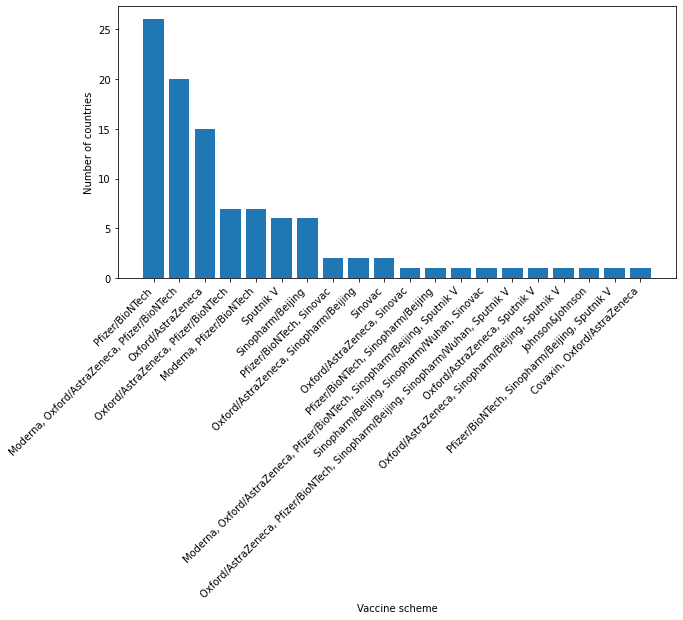

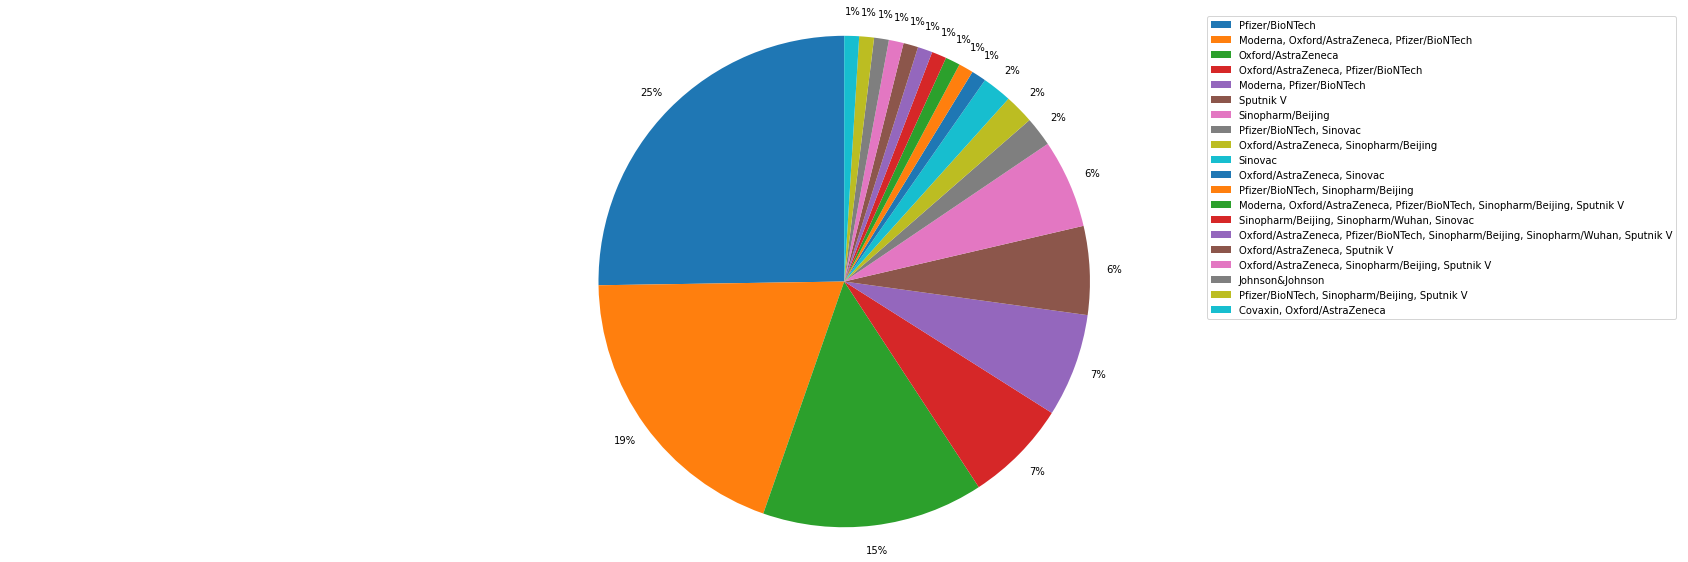

In [291]:
new_data = data.groupby(["country",'iso_code','vaccines']).max().reset_index()
current_info = new_data['vaccines'].value_counts()
print(current_info)

fig,ax = plt.subplots(figsize=(10, 5))
plt.bar(current_info.keys().tolist(), current_info.values)
# plt.xticks(rotation=45)
ax.set_xticklabels(current_info.keys().tolist(), rotation=45, ha='right')
plt.xlabel('Vaccine scheme')
plt.ylabel('Number of countries')
plt.show()


fig1, ax1 = plt.subplots(figsize=(30, 10))
patches, texts, autotexts = ax1.pie(current_info.values, startangle=90, autopct='%1.0f%%', pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, current_info.keys().tolist(), loc="best")
plt.show()

### Observations:
Pfizer/BioNTech is the mostly used vaccine  
25% of the countries solely use Pfizer/BioNTech  
63% of the countries have Pfizer/BioNTech as one option in their vaccine scheme

                  country  total_vaccinations
101         United States          66464947.0
21                  China          40520000.0
100        United Kingdom          18911978.0
45                  India          12366633.0
50                 Israel           7808190.0
96                 Turkey           7619695.0
15                 Brazil           7551676.0
99   United Arab Emirates           5761463.0
37                Germany           5544145.0
36                 France           3974739.0
81                 Russia           3900000.0
51                  Italy           3824331.0
91                  Spain           3284678.0
20                  Chile           3179588.0
77                 Poland           2990683.0
66                Morocco           2948945.0
9              Bangladesh           2673038.0
46              Indonesia           2188788.0
64                 Mexico           1900784.0
18                 Canada           1652282.0
80                Romania         

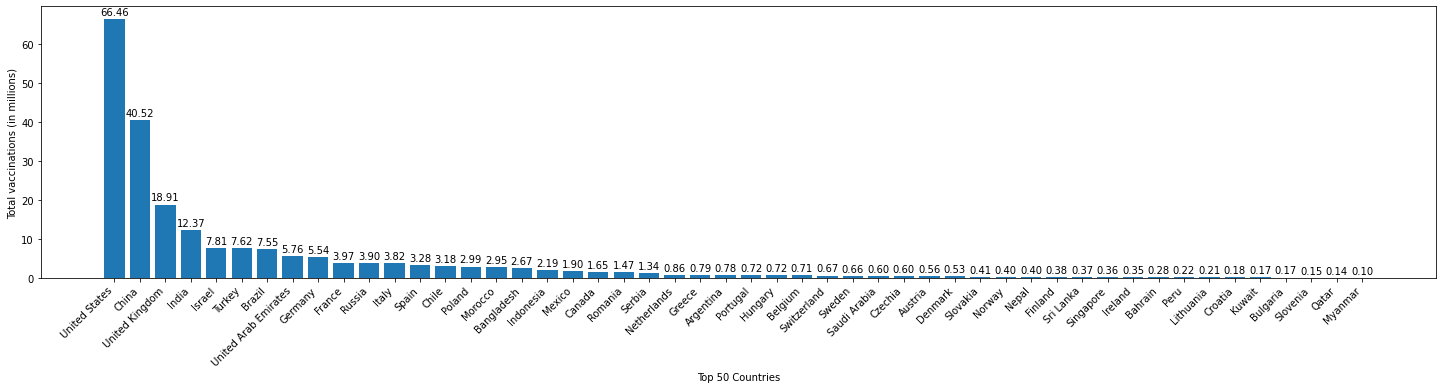

In [292]:
current_info = new_data[['country','total_vaccinations']].nlargest(50,'total_vaccinations')
print(current_info)

from matplotlib.ticker import FuncFormatter

fig,ax = plt.subplots(figsize=(25, 5))
rect = plt.bar(current_info['country'], current_info['total_vaccinations'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{0:g}'.format(x/1000000))) # show y tick in millions
ax.set_xticklabels(current_info['country'], rotation=45, ha='right')
for i, v in enumerate(current_info['total_vaccinations']):
    ax.text(i, v + 1000000, "{:.2f}".format(v/1000000), ha='center')
    # ax.text(rect.get_x() + rect.get_width()/2., 1.05*rect.get_height(), '%d' % int(rect.get_height()), ha='center', va='bottom')
plt.xlabel('Top 50 Countries')
plt.ylabel('Total vaccinations (in millions)')
plt.show()